In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
import xgboost as xgb
from sklearn.metrics import r2_score

In [5]:
# Load the dataset
df = pd.read_csv('C:\\Users\\HP\\Project Finals\\CyberPsychology Final Files\\Mental_Health_tech_DataSet.csv')
df

,User_ID,Screen_time_Working_Hours,Social_Media_Usage_Hours,Gaming_Hours,Age,Gender,Sleep_Hours,Physical_Activity_Hours,Stress_Level,Work_Environment_Impact,Mental_Health_Status
0,User_0001,7,10,5,19,Male,10,9,Medium,Positive,Fair
1,User_0002,4,4,2,37,Male,12,7,Low,Positive,Excellent
2,User_0003,13,9,11,36,Male,8,1,High,Negative,Poor
3,User_0004,11,6,3,40,Male,6,9,Medium,Neutral,Good
4,User_0005,8,8,11,56,Male,8,3,High,Positive,Poor
...,...,...,...,...,...,...,...,...,...,...,...
4995,User_4996,9,1,6,46,Female,8,1,Low,Neutral,Good
4996,User_4997,13,1,11,56,Female,2,5,Medium,Negative,Poor
4997,User_4998,3,11,11,15,Female,11,6,Medium,Positive,Poor
4998,User_4999,12,2,1,52,Female,7,7,Low,Neutral,Excellent


In [6]:
df.shape 
# 10000 rows, 14 columns 

(5000, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   User_ID                    5000 non-null   object
 1   Screen_time_Working_Hours  5000 non-null   int64 
 2   Social_Media_Usage_Hours   5000 non-null   int64 
 3   Gaming_Hours               5000 non-null   int64 
 4   Age                        5000 non-null   int64 
 5   Gender                     5000 non-null   object
 6   Sleep_Hours                5000 non-null   int64 
 7   Physical_Activity_Hours    5000 non-null   int64 
 8   Stress_Level               5000 non-null   object
 9   Work_Environment_Impact    5000 non-null   object
 10  Mental_Health_Status       5000 non-null   object
dtypes: int64(6), object(5)
memory usage: 429.8+ KB


In [8]:
df.isnull().sum()
# NO missing values in any feature

User_ID                      0
Screen_time_Working_Hours    0
Social_Media_Usage_Hours     0
Gaming_Hours                 0
Age                          0
Gender                       0
Sleep_Hours                  0
Physical_Activity_Hours      0
Stress_Level                 0
Work_Environment_Impact      0
Mental_Health_Status         0
dtype: int64

In [9]:
#Checking for duplicates
print(df.duplicated().sum())

0


In [10]:
df.describe()
# some basic statistics 

,Screen_time_Working_Hours,Social_Media_Usage_Hours,Gaming_Hours,Age,Sleep_Hours,Physical_Activity_Hours
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,7.471000,6.488600,5.560600,36.771000,6.932600,5.036000
std,4.054041,3.435437,3.470437,12.913199,3.164879,2.566636
min,1.000000,1.000000,0.000000,15.000000,2.000000,1.000000
25%,4.000000,3.750000,3.000000,26.000000,4.000000,3.000000
50%,7.000000,6.000000,6.000000,36.000000,7.000000,5.000000
75%,11.000000,10.000000,9.000000,48.000000,10.000000,7.000000
max,14.000000,12.000000,11.000000,59.000000,12.000000,9.000000


In [ ]:
# checking OUTLIERS from box plots

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Social_Media_Usage_Hours'),
  Text(2, 0, 'Gaming_Hours'),
  Text(3, 0, 'Screen_time_Working_Hours'),
  Text(4, 0, 'Sleep_Hours'),
  Text(5, 0, 'Physical_Activity_Hours')])

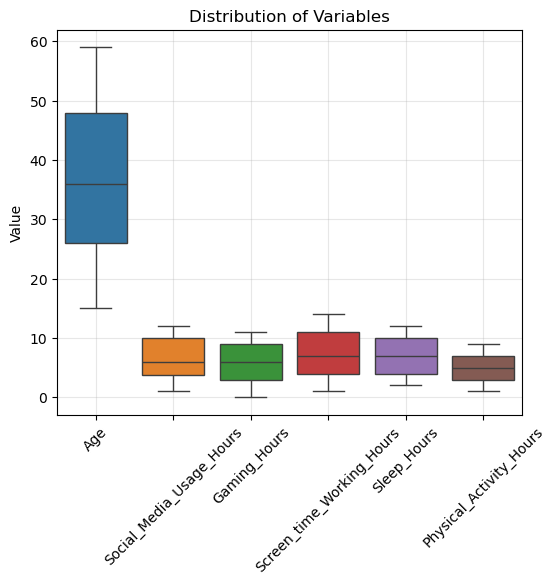

In [11]:
data_to_plot = df[['Age', 'Social_Media_Usage_Hours', 'Gaming_Hours', 'Screen_time_Working_Hours', 'Sleep_Hours', 'Physical_Activity_Hours']]
plt.figure(figsize=(6,5)) 
sns.boxplot(data=data_to_plot) 
plt.ylabel('Value') 
plt.title('Distribution of Variables') 
plt.grid(alpha=0.3) 
plt.xticks(rotation=45) 

In [12]:
#Transformation
data = df

In [14]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

work_mapping = {'Negative': 0,'Neutral': 1,'Positive': 2}
data['Work_Environment_Impact'] = data['Work_Environment_Impact'].replace(work_mapping)

mental_health_mapping = { 'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
data['Mental_Health_Status'] = data['Mental_Health_Status'].replace(mental_health_mapping)

Stress_Level_mapping = { 'Low': 0, 'Medium': 1, 'High': 2}
data['Stress_Level'] = data['Stress_Level'].replace(Stress_Level_mapping)

data

,User_ID,Screen_time_Working_Hours,Social_Media_Usage_Hours,Gaming_Hours,Age,Gender,Sleep_Hours,Physical_Activity_Hours,Stress_Level,Work_Environment_Impact,Mental_Health_Status
0,User_0001,7,10,5,19,1,10,9,1,2,1
1,User_0002,4,4,2,37,1,12,7,0,2,3
2,User_0003,13,9,11,36,1,8,1,2,0,0
3,User_0004,11,6,3,40,1,6,9,1,1,2
4,User_0005,8,8,11,56,1,8,3,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,User_4996,9,1,6,46,0,8,1,0,1,2
4996,User_4997,13,1,11,56,0,2,5,1,0,0
4997,User_4998,3,11,11,15,0,11,6,1,2,0
4998,User_4999,12,2,1,52,0,7,7,0,1,3


In [ ]:
#Univariate Analysis

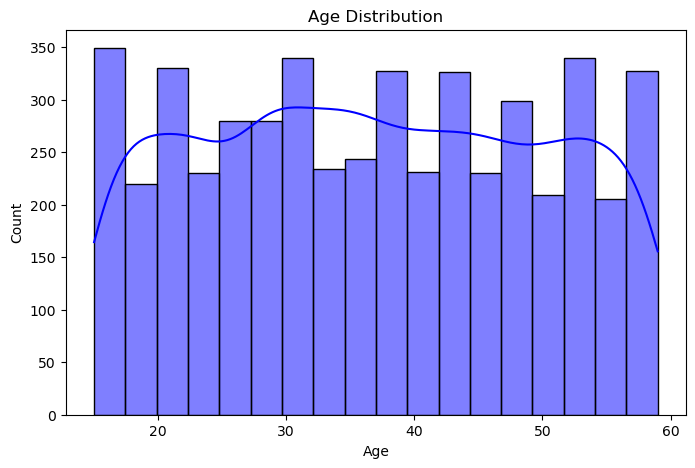

In [15]:
# Plot Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

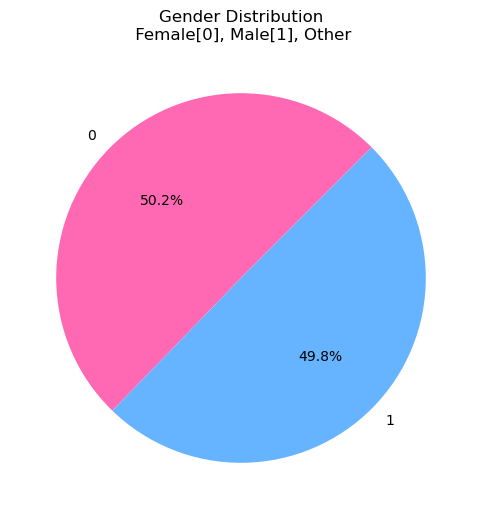

In [16]:
# Pie chart for Gender Distribution
plt.figure(figsize=(6, 6))
colors = ['#ff69b4' , '#66b3ff']
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, startangle=45)
plt.title('Gender Distribution\n Female[0], Male[1], Other')
plt.ylabel('')
plt.show()

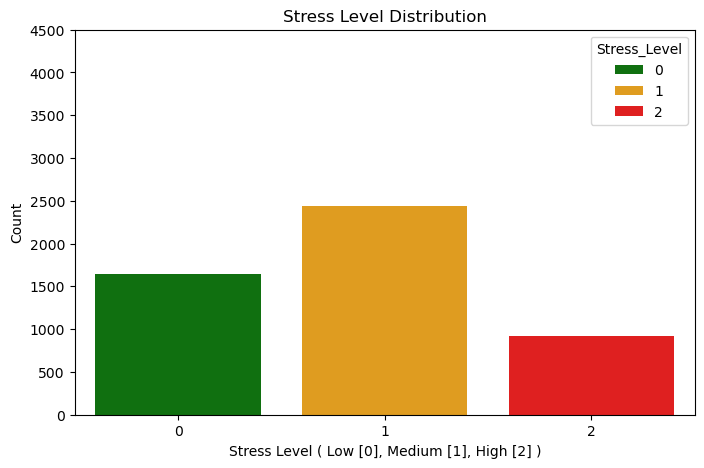

In [17]:
# Plot Stress Level Distribution

plt.figure(figsize=(8, 5))
sns.countplot(x='Stress_Level', data=data, hue = 'Stress_Level', palette=['green', 'orange', 'red'])
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level ( Low [0], Medium [1], High [2] )')
plt.ylabel('Count')
plt.yticks(range(0, 5000, 500))
plt.show()


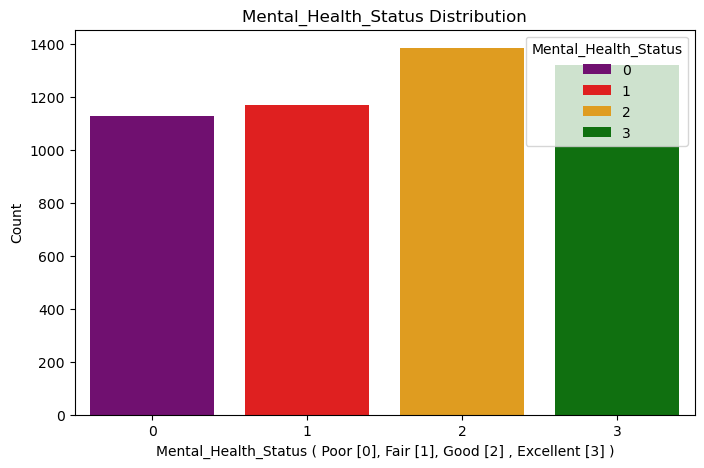

In [18]:
# Plot Mental Health Status Distribution

plt.figure(figsize=(8, 5))
sns.countplot(x='Mental_Health_Status', data=data, hue = 'Mental_Health_Status', palette=['purple', 'red', 'orange', 'green'])
plt.title('Mental_Health_Status Distribution')
plt.xlabel('Mental_Health_Status ( Poor [0], Fair [1], Good [2] , Excellent [3] )')
plt.ylabel('Count')
plt.show()

In [ ]:
#Bi=Variate Analysis

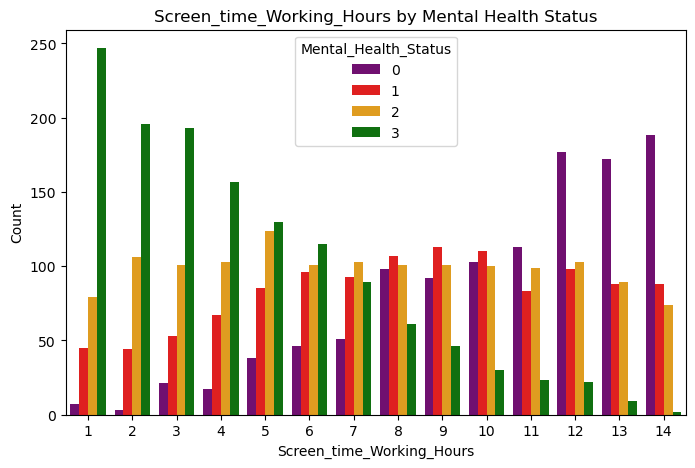

In [20]:
# Box plot for Screen_time_Working_Hours vs Mental Health Status
plt.figure(figsize=(8,5))
sns.countplot(x='Screen_time_Working_Hours', hue='Mental_Health_Status', data=data, palette = ['purple', 'red', 'orange', 'green'])
plt.title('Screen_time_Working_Hours by Mental Health Status')
plt.xlabel('Screen_time_Working_Hours')
plt.ylabel('Count')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7112\3241243808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mental_Health_Status', y='Social_Media_Usage_Hours',   data=data, palette = ['purple', 'red', 'orange', 'green'])


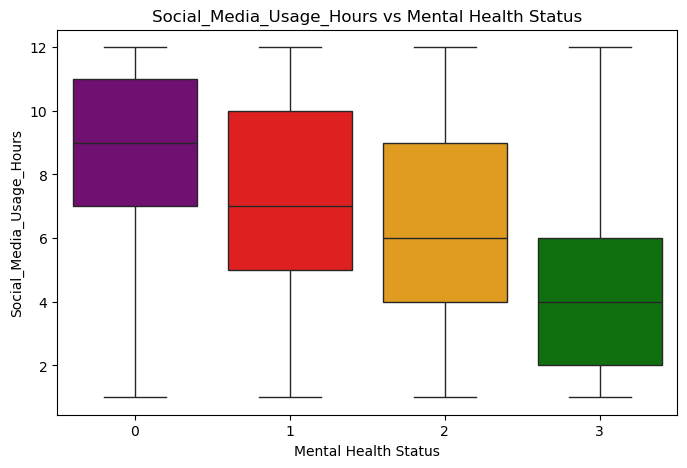

In [21]:
# Box plot for Social_Media_Usage_Hours vs Mental Health Status
plt.figure(figsize=(8,5))
sns.boxplot(x='Mental_Health_Status', y='Social_Media_Usage_Hours',   data=data, palette = ['purple', 'red', 'orange', 'green'])
plt.title('Social_Media_Usage_Hours vs Mental Health Status')
plt.xlabel('Mental Health Status')
plt.ylabel('Social_Media_Usage_Hours')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7112\3056003814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mental_Health_Status', y='Gaming_Hours',   data=data, palette = ['purple', 'red', 'orange', 'green'])


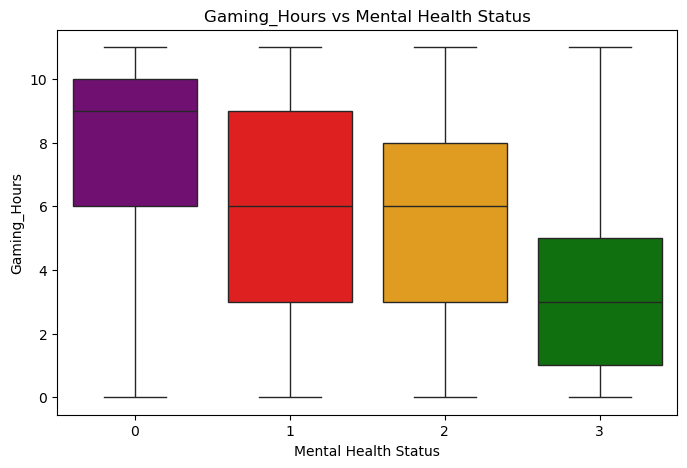

In [22]:
# Box plot for Gaming_Hours vs Mental Health Status
plt.figure(figsize=(8,5))
sns.boxplot(x='Mental_Health_Status', y='Gaming_Hours',   data=data, palette = ['purple', 'red', 'orange', 'green'])
plt.title('Gaming_Hours vs Mental Health Status')
plt.xlabel('Mental Health Status')
plt.ylabel('Gaming_Hours')
plt.show()

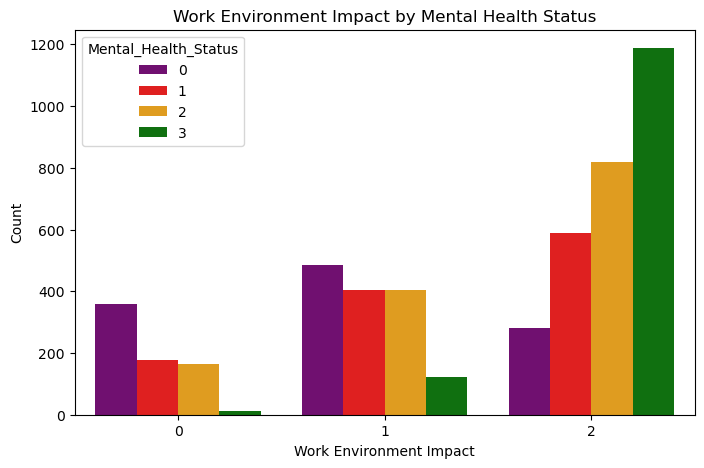

In [23]:
# Count plot for Work Environment Impact by Mental Health Status
plt.figure(figsize=(8,5))
sns.countplot(x='Work_Environment_Impact', hue='Mental_Health_Status', data=data, palette = ['purple', 'red', 'orange', 'green'])
plt.title('Work Environment Impact by Mental Health Status')
plt.xlabel('Work Environment Impact')
plt.ylabel('Count')
plt.show()

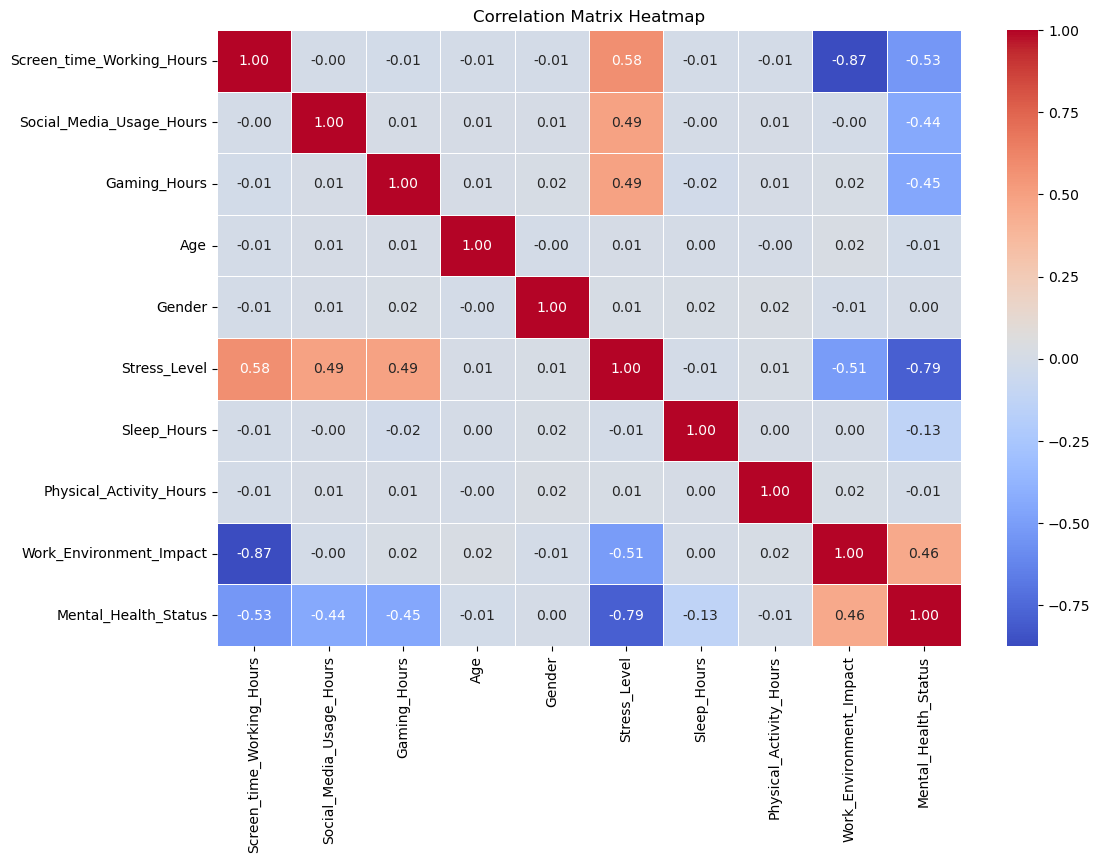

In [24]:
columns_to_include = [
    'Screen_time_Working_Hours', 
    'Social_Media_Usage_Hours', 
    'Gaming_Hours', 
    'Age', 
    'Gender',
    'Stress_Level',
    'Sleep_Hours', 
    'Physical_Activity_Hours', 
    'Work_Environment_Impact',
    'Mental_Health_Status'
]

data_selected = data[columns_to_include]
correlation_matrix = data_selected.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title("Correlation Matrix Heatmap")

# Display the plot
plt.show()

In [ ]:
# Feature Selection

In [27]:
# random forest
columns_to_include = [
    'Screen_time_Working_Hours', 
    'Social_Media_Usage_Hours', 
    'Gaming_Hours', 
    'Age', 
    'Gender',
    'Stress_Level',
    'Sleep_Hours', 
    'Physical_Activity_Hours', 
    'Work_Environment_Impact',
    'Mental_Health_Status'
]

data1 = data[columns_to_include]

# Split the data into features and target variable
X = data1.drop(columns=['Mental_Health_Status'])
y = data['Mental_Health_Status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy and generate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Feature Importances:\n", feature_importances)

Accuracy: 0.922
Confusion Matrix:
 [[216  22   0   0]
 [  4 203   9   0]
 [  0  22 262  14]
 [  0   0   7 241]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       238
           1       0.82      0.94      0.88       216
           2       0.94      0.88      0.91       298
           3       0.95      0.97      0.96       248

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.93      0.92      0.92      1000

Feature Importances:
                      Feature  Importance
5               Stress_Level    0.246569
6                Sleep_Hours    0.232500
2               Gaming_Hours    0.126878
1   Social_Media_Usage_Hours    0.121342
0  Screen_time_Working_Hours    0.107158
3                        Age    0.070143
7    Physical_Activity_Hours    0.046501
8    Work_Environment_Impact    0.034495
4                     Gender    0.0144

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Logistic Regression
columns_to_include = [
    'Screen_time_Working_Hours', 
    'Social_Media_Usage_Hours', 
    'Gaming_Hours', 
    'Age', 
    'Gender',
    'Stress_Level',
    'Sleep_Hours', 
    'Physical_Activity_Hours', 
    'Work_Environment_Impact',
    'Mental_Health_Status'
]

data1 = data[columns_to_include]

# Split the data into features and target variable
X = data1.drop(columns=['Mental_Health_Status'])
y = data['Mental_Health_Status']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg_model.predict(X_test)

# Calculate accuracy and generate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

feature_names = X.columns  # Replace X with your input features DataFrame

# Get the coefficients of the model
coefficients = logreg_model.coef_[0]

# Create a DataFrame to display feature names with their importance (absolute value of coefficients)
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance in Logistic Regression:")
print(feature_importance)

Accuracy: 0.7413333333333333
Confusion Matrix:
 [[300  45   0   0]
 [ 33 128 178   0]
 [ 67  37 296  20]
 [  0   0   8 388]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81       345
           1       0.61      0.38      0.47       339
           2       0.61      0.70      0.66       420
           3       0.95      0.98      0.97       396

    accuracy                           0.74      1500
   macro avg       0.73      0.73      0.72      1500
weighted avg       0.73      0.74      0.73      1500

Feature Importance in Logistic Regression:
                     Feature  Importance
0  Screen_time_Working_Hours    3.349372
2               Gaming_Hours    2.831285
1   Social_Media_Usage_Hours    2.684488
6                Sleep_Hours    1.105741
5               Stress_Level    0.478121
3                        Age    0.042718
7    Physical_Activity_Hours    0.033497
4                     Gender    0.020459
8   

In [35]:
# xg boost

columns_to_include = [
    'Screen_time_Working_Hours', 
    'Social_Media_Usage_Hours', 
    'Gaming_Hours', 
    'Age', 
    'Gender',
    'Stress_Level',
    'Sleep_Hours', 
    'Physical_Activity_Hours', 
    'Work_Environment_Impact',
    'Mental_Health_Status'
]

data1 = data[columns_to_include]

# Split the data into features and target variable
X = data1.drop(columns=['Mental_Health_Status'])
y = data['Mental_Health_Status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=1)  # scale_pos_weight helps with imbalanced classes

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Calculate accuracy and generate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Feature Importances:\n", feature_importances)

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.948
Confusion Matrix:
 [[232   6   0   0]
 [  5 203   8   0]
 [  0  17 272   9]
 [  0   0   7 241]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       238
           1       0.90      0.94      0.92       216
           2       0.95      0.91      0.93       298
           3       0.96      0.97      0.97       248

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

Feature Importances:
                      Feature  Importance
5               Stress_Level    0.853851
6                Sleep_Hours    0.068384
1   Social_Media_Usage_Hours    0.023998
2               Gaming_Hours    0.020596
0  Screen_time_Working_Hours    0.019263
3                        Age    0.005133
7    Physical_Activity_Hours    0.004667
4                     Gender    0.004107
8    Work_Environment_Impact    0.0000

In [36]:
# After removing Gender and Work_Environment_Impact

# random forest
columns_to_include = [
    'Screen_time_Working_Hours', 
    'Social_Media_Usage_Hours', 
    'Gaming_Hours', 
    'Age', 
    'Stress_Level',
    'Sleep_Hours', 
    'Physical_Activity_Hours', 
    'Mental_Health_Status'
]

data1 = data[columns_to_include]

# Split the data into features and target variable
X = data1.drop(columns=['Mental_Health_Status'])
y = data['Mental_Health_Status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy and generate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Feature Importances:\n", feature_importances)

Accuracy: 0.917
Confusion Matrix:
 [[215  23   0   0]
 [  3 202  11   0]
 [  0  26 261  11]
 [  0   0   9 239]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       238
           1       0.80      0.94      0.87       216
           2       0.93      0.88      0.90       298
           3       0.96      0.96      0.96       248

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000

Feature Importances:
                      Feature  Importance
4               Stress_Level    0.254527
5                Sleep_Hours    0.217998
0  Screen_time_Working_Hours    0.149022
2               Gaming_Hours    0.125489
1   Social_Media_Usage_Hours    0.122370
3                        Age    0.078086
6    Physical_Activity_Hours    0.052509


In [37]:
# After removing Gender and Work_Environment_Impact

# Logistic Regression
columns_to_include = [
    'Screen_time_Working_Hours', 
    'Social_Media_Usage_Hours', 
    'Gaming_Hours', 
    'Age', 
    'Stress_Level',
    'Sleep_Hours', 
    'Physical_Activity_Hours', 
    'Mental_Health_Status'
]

data1 = data[columns_to_include]

# Split the data into features and target variable
X = data1.drop(columns=['Mental_Health_Status'])
y = data['Mental_Health_Status']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg_model.predict(X_test)

# Calculate accuracy and generate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

feature_names = X.columns  # Replace X with your input features DataFrame

# Get the coefficients of the model
coefficients = logreg_model.coef_[0]

# Create a DataFrame to display feature names with their importance (absolute value of coefficients)
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance in Logistic Regression:")
print(feature_importance)

Accuracy: 0.7413333333333333
Confusion Matrix:
 [[300  45   0   0]
 [ 32 122 185   0]
 [ 67  33 300  20]
 [  0   0   6 390]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81       345
           1       0.61      0.36      0.45       339
           2       0.61      0.71      0.66       420
           3       0.95      0.98      0.97       396

    accuracy                           0.74      1500
   macro avg       0.73      0.73      0.72      1500
weighted avg       0.73      0.74      0.73      1500

Feature Importance in Logistic Regression:
                     Feature  Importance
0  Screen_time_Working_Hours    3.300661
2               Gaming_Hours    2.818179
1   Social_Media_Usage_Hours    2.671199
5                Sleep_Hours    1.106012
4               Stress_Level    0.506731
3                        Age    0.044594
6    Physical_Activity_Hours    0.033945


In [38]:
# After removing Gender and Work_Environment_Impact

# XG Boost
columns_to_include = [
    'Screen_time_Working_Hours', 
    'Social_Media_Usage_Hours', 
    'Gaming_Hours', 
    'Age', 
    'Stress_Level',
    'Sleep_Hours', 
    'Physical_Activity_Hours', 
    'Mental_Health_Status'
]

data1 = data[columns_to_include]

# Split the data into features and target variable
X = data1.drop(columns=['Mental_Health_Status'])
y = data['Mental_Health_Status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=1)  # scale_pos_weight helps with imbalanced classes

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Calculate accuracy and generate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Feature Importances:\n", feature_importances)

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.954
Confusion Matrix:
 [[230   8   0   0]
 [  2 206   8   0]
 [  0  14 276   8]
 [  0   0   6 242]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       238
           1       0.90      0.95      0.93       216
           2       0.95      0.93      0.94       298
           3       0.97      0.98      0.97       248

    accuracy                           0.95      1000
   macro avg       0.95      0.96      0.95      1000
weighted avg       0.95      0.95      0.95      1000

Feature Importances:
                      Feature  Importance
4               Stress_Level    0.854368
5                Sleep_Hours    0.069861
1   Social_Media_Usage_Hours    0.024917
2               Gaming_Hours    0.020786
0  Screen_time_Working_Hours    0.020075
3                        Age    0.005284
6    Physical_Activity_Hours    0.004709


In [ ]:
# As in the training of 3 models on the data set and ecavluating feature importance, all the 3 models listed 'Gender' and 'Work_Environment_Impact' 
# at the end represented as least important in analysis
# Also, we have checked that after removing these two features from analysis, xg boost is showing improved acuuracy,
# a very slight negative change in random forest & no change in accuracy.
# Therefore, we decided to omit these two features from our analysis based on their least feature importance and improvement in acuuracy after removing them.

# ALso, among all the 3 models, XG Boost is providing us with the highest accuracy, precisions, recalls and f1 score. Therefore, this is our final model.

In [ ]:
# Finak Model Training

In [39]:
# Training of Final Model

# XG Boost
columns_to_include = [
    'Screen_time_Working_Hours', 
    'Social_Media_Usage_Hours', 
    'Gaming_Hours', 
    'Age', 
    'Stress_Level',
    'Sleep_Hours', 
    'Physical_Activity_Hours', 
    'Mental_Health_Status'
]

data1 = data[columns_to_include]

# Split the data into features and target variable
X = data1.drop(columns=['Mental_Health_Status'])
y = data['Mental_Health_Status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=1)  # scale_pos_weight helps with imbalanced classes

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Calculate accuracy and generate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Feature Importances:\n", feature_importances)

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.954
Confusion Matrix:
 [[230   8   0   0]
 [  2 206   8   0]
 [  0  14 276   8]
 [  0   0   6 242]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       238
           1       0.90      0.95      0.93       216
           2       0.95      0.93      0.94       298
           3       0.97      0.98      0.97       248

    accuracy                           0.95      1000
   macro avg       0.95      0.96      0.95      1000
weighted avg       0.95      0.95      0.95      1000

Feature Importances:
                      Feature  Importance
4               Stress_Level    0.854368
5                Sleep_Hours    0.069861
1   Social_Media_Usage_Hours    0.024917
2               Gaming_Hours    0.020786
0  Screen_time_Working_Hours    0.020075
3                        Age    0.005284
6    Physical_Activity_Hours    0.004709


In [42]:
r2 = r2_score(y_test, y_pred)

print("Coefficient of Determination (R²):", r2)

Coefficient of Determination (R²): 0.9622599404035233


In [83]:
# Create a single sample input record
sample_data = {
    'Screen_time_Working_Hours': [12], 
    'Social_Media_Usage_Hours': [4], 
    'Gaming_Hours': [5], 
    'Age': [20], 
    'Stress_Level': [2],  # Example stress level (e.g., Low: 0, Medium: 1, High: 2)
    'Sleep_Hours': [2], 
    'Physical_Activity_Hours': [0]
}

# Convert the sample record to a DataFrame
sample_df = pd.DataFrame(sample_data)

# Predict using the trained model
sample_prediction = xgb_model.predict(sample_df)

# Map the prediction to mental health status labels
mental_health_mapping = {
    0: 'Poor', 
    1: 'Fair', 
    2: 'Good', 
    3: 'Excellent'
}

# Print the result
predicted_status = mental_health_mapping[sample_prediction[0]]
print("Predicted Mental Health Status for the sample record:", predicted_status)


Predicted Mental Health Status for the sample record: Poor


In [86]:
# Create a single sample input record
sample_data = {
    'Screen_time_Working_Hours': [12], 
    'Social_Media_Usage_Hours': [4], 
    'Gaming_Hours': [4], 
    'Age': [20], 
    'Stress_Level': [2],  # Example stress level (e.g., Low: 0, Medium: 1, High: 2)
    'Sleep_Hours': [3], 
    'Physical_Activity_Hours': [1]
}

# Convert the sample record to a DataFrame
sample_df = pd.DataFrame(sample_data)

# Predict using the trained model
sample_prediction = xgb_model.predict(sample_df)

# Map the prediction to mental health status labels
mental_health_mapping = {
    0: 'Poor', 
    1: 'Fair', 
    2: 'Good', 
    3: 'Excellent'
}

# Print the result
predicted_status = mental_health_mapping[sample_prediction[0]]
print("Predicted Mental Health Status for the sample record:", predicted_status)


Predicted Mental Health Status for the sample record: Fair


In [87]:
# Create a single sample input record
sample_data = {
    'Screen_time_Working_Hours': [10], 
    'Social_Media_Usage_Hours': [3], 
    'Gaming_Hours': [3], 
    'Age': [20], 
    'Stress_Level': [1],  # Example stress level (e.g., Low: 0, Medium: 1, High: 2)
    'Sleep_Hours': [6], 
    'Physical_Activity_Hours': [2]
}

# Convert the sample record to a DataFrame
sample_df = pd.DataFrame(sample_data)

# Predict using the trained model
sample_prediction = xgb_model.predict(sample_df)

# Map the prediction to mental health status labels
mental_health_mapping = {
    0: 'Poor', 
    1: 'Fair', 
    2: 'Good', 
    3: 'Excellent'
}

# Print the result
predicted_status = mental_health_mapping[sample_prediction[0]]
print("Predicted Mental Health Status for the sample record:", predicted_status)


Predicted Mental Health Status for the sample record: Good


In [88]:
# Create a single sample input record
sample_data = {
    'Screen_time_Working_Hours': [7], 
    'Social_Media_Usage_Hours': [4], 
    'Gaming_Hours': [1], 
    'Age': [20], 
    'Stress_Level': [0],  # Example stress level (e.g., Low: 0, Medium: 1, High: 2)
    'Sleep_Hours': [8], 
    'Physical_Activity_Hours': [3]
}

# Convert the sample record to a DataFrame
sample_df = pd.DataFrame(sample_data)

# Predict using the trained model
sample_prediction = xgb_model.predict(sample_df)

# Map the prediction to mental health status labels
mental_health_mapping = {
    0: 'Poor', 
    1: 'Fair', 
    2: 'Good', 
    3: 'Excellent'
}

# Print the result
predicted_status = mental_health_mapping[sample_prediction[0]]
print("Predicted Mental Health Status for the sample record:", predicted_status)


Predicted Mental Health Status for the sample record: Excellent


In [ ]:
# THE END!!!